# NLP with Job Posting Data <br><br>

In this study we are going to deveop a machine learning model to predict the skills that are important for each job. We will use a data set of job postings data from indeed.ca

This data set has the job postings information related to 4 job titles: Data Scientist, Carpenter, Registered Nurse, and Customer Service. Using this data set, we are going to predict the top 10 most important skills for each of these titles.

## Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [5]:
df = pd.read_csv("Jobs.csv", index_col=False)
df.head()

,Job Title,Company Name,Location,job URL,Job Description,Group,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Data Scientist,MSi Corp (Bell Canada),"Toronto, ON",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,Our telecom client is looking for junior and i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data Scientist,Modern Cleaning Concept,"Lasalle, QC",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,Job Description – Data ScientistWe are looking...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data Scientist,Slice Insurance Technologies Inc.,"Ottawa, ON",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,WE are Slice Labs (Slice). We’re building a te...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Senior Data Analyst,Instaclick Inc.,"Toronto, ON",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,This role is responsible for working within th...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data Scientist,Equitable Life of Canada,"Waterloo, ON",http://www.indeed.ca/rc/clk?jk=a3a91d6b9b57a2d...,"At Equitable Life of Canada, we realize that y...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

According to IBM Data Analytics you can expect to spend up to 80% of your time cleaning data. 
https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

![](http://)First we need to take care of the missing values

In [6]:
df.keys()

Index(['Job Title', 'Company Name', 'Location', 'job URL', 'Job Description',
       'Group', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [7]:
# Removing the extra columns

df=df[['Job Title', 'Company Name', 'Location',
       'job URL', 'Job Description', 'Group']]
df.head(3)

,Job Title,Company Name,Location,job URL,Job Description,Group
0,Data Scientist,MSi Corp (Bell Canada),"Toronto, ON",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,Our telecom client is looking for junior and i...,1
1,Data Scientist,Modern Cleaning Concept,"Lasalle, QC",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,Job Description – Data ScientistWe are looking...,1
2,Data Scientist,Slice Insurance Technologies Inc.,"Ottawa, ON",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,WE are Slice Labs (Slice). We’re building a te...,1


# Getting the number of job postings by job title groups

In [8]:
df['Group'].unique()

array(['1',
       'A postdoctoral fellow position is available in the Faculty of Pharmaceutical Sciences at the University of British Columbia (UBC) ‐ in Vancouver, British Columbia, Canada.The successful applicant will become a member of the Collaboration for Outcomes Research and Evaluation (CORE)—an academic research group whose mission is to improve health‐care related outcomes through the application of the best in research, education and practice enhancement strategies. To find out more about the CORE group, please see our website: https://core.ubc.ca.The successful candidate will be involved in an exciting cross‐Canada collaboration to apply advanced data science techniques (eg. data visualization, machine learning, artificial intelligence) to build predictive models of health outcomes among individuals with neurological diseases. The focus of the projects will be in multiple sclerosis (MS), with the potential to expand to other neurological conditions. This is an opportunity t

In [16]:
df[(df['Group']!='1') & (df['Group']!='2') & (df['Group']!='3') & (df['Group']!='4')]

,Job Title,Company Name,Location,job URL,Job Description,Group
432,Postdoctoral Fellowship in Data Science for Ne...,Collaboration for Outcomes Research and Evalua...,University of British Columbia,"Vancouver, BC",http://www.indeed.ca/rc/clk?cmp=Collaboration-...,A postdoctoral fellow position is available in...
1125,Carpenter / Foreman,Wellington Builders,"Forest, ON",http://www.indeed.ca/company/Wellington-Builde...,Job SummaryExperienced Carpenter/ForemanWellin...,Recommend personnel actions


### This shows these two rows have invalid entries in the Group column. Since they are only two rows, we can remove them

In [17]:
df = df[(df['Group']=='1') | (df['Group']=='2') | (df['Group']=='3') | (df['Group']=='4')]

# Changing data type of the column Group

In [18]:
df['Group'] = df['Group'].astype(int)

In [19]:
Number_of_Jobs = df.groupby('Group')['Job Title'].count()
Number_of_Jobs.columns=['Job Title ID', 'Number of Job Postings']
Number_of_Jobs

Group
1    2987
2    2121
3    1331
4    1276
Name: Job Title, dtype: int64

Int64Index([1, 2, 3, 4], dtype='int64', name='Group')
[2987, 2121, 1331, 1276]


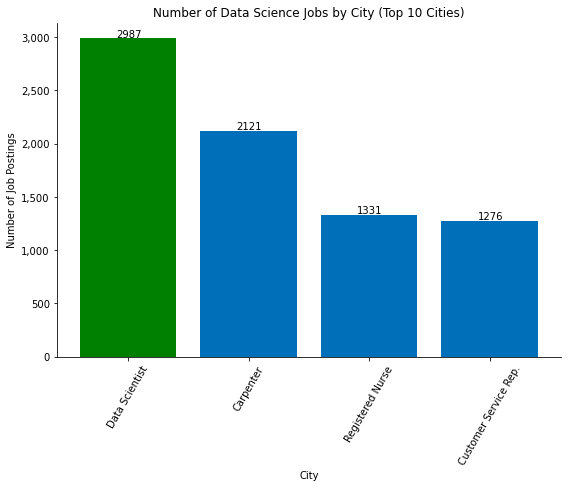

In [22]:

job_names = ['Data Scientist','Carpenter','Registered Nurse','Customer Service Rep.']
colors = ['green', '#006fb9','#006fb9','#006fb9']


plt.figure(figsize=(10,8))
xvals = Number_of_Jobs.index
yvals = Number_of_Jobs.tolist()
print(xvals)
print(yvals)
plt.bar(xvals, yvals, color=colors)
plt.xticks(rotation=60)
#plt.margins(0.2)

plt.subplots_adjust(bottom=0.3, left=0.2)
plt.title('Number of Data Science Jobs by City (Top 10 Cities)')
plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.xticks(np.arange(min(xvals), max(xvals)+1, 1.0),(job_names))
#plt.xticks('A','B','C','D')

#Having the y axis formatted as thousand separated
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, v in enumerate(yvals):
    ax.text(i+0.9, v+10, str(v))

## First we will take only two job titles, Data Scientist and Carpenter

In [23]:
df = df[df['Group']<3]


In [24]:
df['Group'] = np.where(df['Group']==1,0,1)

In [25]:
df.head(-1)

,Job Title,Company Name,Location,job URL,Job Description,Group
0,Data Scientist,MSi Corp (Bell Canada),"Toronto, ON",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,Our telecom client is looking for junior and i...,0
1,Data Scientist,Modern Cleaning Concept,"Lasalle, QC",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,Job Description – Data ScientistWe are looking...,0
2,Data Scientist,Slice Insurance Technologies Inc.,"Ottawa, ON",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,WE are Slice Labs (Slice). We’re building a te...,0
3,Senior Data Analyst,Instaclick Inc.,"Toronto, ON",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,This role is responsible for working within th...,0
4,Data Scientist,Equitable Life of Canada,"Waterloo, ON",http://www.indeed.ca/rc/clk?jk=a3a91d6b9b57a2d...,"At Equitable Life of Canada, we realize that y...",0
...,...,...,...,...,...,...
7711,WOODWORKING TEACHER 2019-2020,Westside Waldorf School,"Pacific Palisades, CA 90272",http://www.indeed.ca/rc/clk?jk=c0b7ee6ed556d69...,Description\nPart-Time Block Teaching\n\nThe W...,1
7712,Furniture Finisher,Millwork Brothers,"Cerritos, CA 90703",http://www.indeed.ca/rc/clk?jk=e69136b9ef83d40...,High-end custom cabinetry and mill work compan...,1
7713,Lead Art Instructor- Fabrication & Woodworking,Exceptional Children's Foundation,"Inglewood, CA",http://www.indeed.ca/rc/clk?jk=2763aab84bef4b9...,Title: Lead Art Instructor – Fabrication and W...,1
7714,Lead Cabinet Installer,Marmol Radziner,"El Segundo, CA 90245",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,Job Description(Traducción al español abajo)CA...,1


Int64Index([0, 1], dtype='int64', name='Group')
[2987, 2121]


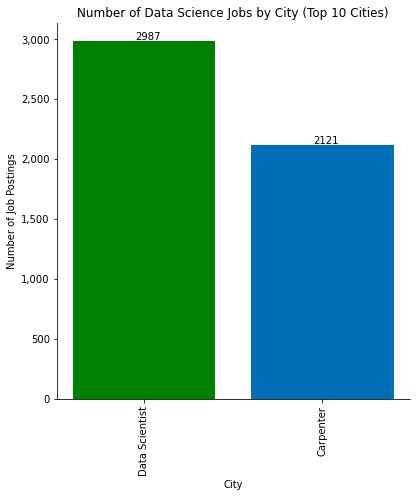

In [26]:
Number_of_Jobs = df.groupby('Group')['Job Title'].count()
Number_of_Jobs.columns=['Job Title ID', 'Number of Job Postings']

colors = ['green', '#006fb9','#006fb9','#006fb9']


plt.figure(figsize=(7,9))
xvals = Number_of_Jobs.index
yvals = Number_of_Jobs.tolist()
print(xvals)
print(yvals)
plt.bar(xvals, yvals, color=colors)
plt.xticks(rotation=90)
#plt.margins(0.2)

plt.subplots_adjust(bottom=0.3, left=0.2)
plt.title('Number of Data Science Jobs by City (Top 10 Cities)')
plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.xticks(np.arange(min(xvals), max(xvals)+1, 1.0),('Data Scientist','Carpenter','Registered Nurse','Customer Service Rep.'))
#plt.xticks('A','B','C','D')

#Having the y axis formatted as thousand separated
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, v in enumerate(yvals):
    ax.text(i-0.05, v+10, str(v))

## As you see, the data set is unbalanced

### Up-sampling the data set

In [27]:
from sklearn.utils import resample 


# Separate majority and minority classes
df_majority = df[df['Group']==0]
df_minority = df[df['Group']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts

df_upsampled.groupby('Group')['Group'].count()

Group
0    2987
1    2987
Name: Group, dtype: int64

In [28]:
df = df_upsampled.copy()

Int64Index([0, 1], dtype='int64', name='Group')
[2987, 2987]


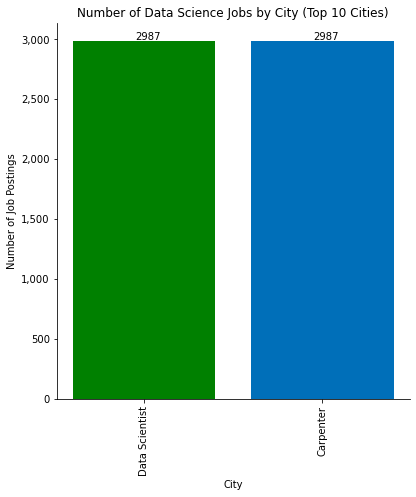

In [29]:
Number_of_Jobs = df.groupby('Group')['Job Title'].count()
Number_of_Jobs.columns=['Job Title ID', 'Number of Job Postings']

colors = ['green', '#006fb9','#006fb9','#006fb9']


plt.figure(figsize=(7,9))
xvals = Number_of_Jobs.index
yvals = Number_of_Jobs.tolist()
print(xvals)
print(yvals)
plt.bar(xvals, yvals, color=colors)
plt.xticks(rotation=90)
#plt.margins(0.2)

plt.subplots_adjust(bottom=0.3, left=0.2)
plt.title('Number of Data Science Jobs by City (Top 10 Cities)')
plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.xticks(np.arange(min(xvals), max(xvals)+1, 1.0),('Data Scientist','Carpenter','Registered Nurse','Customer Service Rep.'))
#plt.xticks('A','B','C','D')

#Having the y axis formatted as thousand separated
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, v in enumerate(yvals):
    ax.text(i-0.05, v+10, str(v))

# Machine Learning with Sklearn

In [30]:
df.head(3)

,Job Title,Company Name,Location,job URL,Job Description,Group
0,Data Scientist,MSi Corp (Bell Canada),"Toronto, ON",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,Our telecom client is looking for junior and i...,0
1,Data Scientist,Modern Cleaning Concept,"Lasalle, QC",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,Job Description – Data ScientistWe are looking...,0
2,Data Scientist,Slice Insurance Technologies Inc.,"Ottawa, ON",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,WE are Slice Labs (Slice). We’re building a te...,0


In [31]:
df.Group.unique()

array([0, 1])

In [32]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Job Description'],
                                                   df['Group'],
                                                   random_state=0)

In [33]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 Job Description:
We are looking for a Data Scientist to join our team in launching a new data product for crypto asset investors. You will apply your machine learning and cognitive computing skills to vast and varied data sets. In this role, you will work with product / project managers, designers, and engineers to build and scale our business. Our application is being built completely in the cloud. We use modern technologies and are always open to improving our tools and our process.
The Team
The Fidelity Center for Applied Technology (FCAT) supports the entire Fidelity business with a mission to catalyze innovation for Fidelity and its clients. We are a group within FCAT that is leading efforts on exploring blockchain technologies to disrupt business models and provide new opportunities with new products and services—this team was the launching pad for the recently announced Fidelity Digital Asset Services (FDAS). We have a multi-disciplinary team of software e

In [34]:
X_train.head()

5201    Job Description:\nWe are looking for a Data Sc...
508     The Faculty of Applied Science and Engineering...
7480    Guy Carpenter is a leading global risk and rei...
88      Introduction\nAt IBM, work is more than a job ...
7619    Position Summary:\nBored with rough carpentry?...
Name: Job Description, dtype: object

## CountVectorizer

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [36]:
vect.get_feature_names()[::1000]

['00',
 '609',
 'agora',
 'assetmoerae',
 'bizj',
 'cartoon',
 'committee',
 'covenanthealth',
 'deployable',
 'drpm',
 'epidemic',
 'fft',
 'gems',
 'hiking',
 'ingest',
 'juntar',
 'locationpay',
 'metabase',
 'necessitates',
 'orchestration',
 'phoenix',
 'problemscommunicate',
 'randomizationsolid',
 'resides',
 'scientistanalytics',
 'skylights',
 'streamsability',
 'tend',
 'trips',
 'virven',
 'zodius']

# Finding the number of features after the CountVectorizer

In [37]:
print('We now have',len(vect.get_feature_names()),'features after fitting the CountVectorizer on training set')

We now have 30133 features after fitting the CountVectorizer on training set


In [38]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<4480x30133 sparse matrix of type '<class 'numpy.int64'>'
	with 967692 stored elements in Compressed Sparse Row format>

# Training the model

In [39]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression().fit(X_train_vectorized, y_train)

In [40]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
prediction = model.predict(vect.transform(X_test))

print('AUC:', roc_auc_score(y_test,prediction))

AUC: 0.9966261808367072


In [41]:
# Get feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()
#print(sorted_coef_index)
# Find the 10 smalles and 10 largest coefficients
# The 10 largest coefficients are bein indexed using [:-11:-1]

print('Coefficients related to job title 1 (Data Scientist):\n {}\n'.format(feature_names[sorted_coef_index[:20]]))
print('Coefficients related to job title 2 (Carpenter):\n {}\n'.format(feature_names[sorted_coef_index[:-21:-1]]))

Coefficients related to job title 1 (Data Scientist):
 ['name' 'data' 'learning' 'machine' 'science' 'business' 'systems'
 'software' 'intelligence' 'engineering' 'ai' 'analytics' 'or' 'computer'
 'provide' 'sql' 'alloy' 'research' 'engineer' 'using']

Coefficients related to job title 2 (Carpenter):
 ['unknown' 'carpentry' 'type' 'construction' 'work' 'carpenter' 'full'
 'materials' 'carpenters' 'experienced' 'tools' 'who' 'area' 'please' '00'
 'must' 'an' 'wood' 'cabinet' 'years']



# Improving the results:

As you can see, the model was able to find the keywords related to each job title. But there are still some words that are not related, such as "with", "unknown", and "00".<br>
For improving the results, we are going to use Tfidf

Also you can see that the model was able to find the keywords "machine", and "learning" related to Data Scientist job title separately, but the model was not able to detect that Machine Learning is considered as one term. We will use n-grams to improve the model regarding this issue.

# Tfidf

1. Tfidf is an statistical approach<br><br>

**Tf–idf, or Term frequency-inverse document frequency, allows us to weight terms based on how important they are to a document.
High weight is given to terms that appear often in a particular document, but don't appear often in the corpus.
Features with low tf–idf are either commonly used across all documents or rarely used and only occur in long documents.
Features with high tf–idf are frequently used within specific documents, but rarely used across all documents. 

## There is a possibility that Tfidf cant be a good aproach, because this metric calculates the number of times a word appears in a text (term frequency) and compares it with the inverse document frequency (how rare or common that word is in the entire data set)[](http://)

Also the words that appear more frequently in a group of documents are not necessarily the most relevant. Likewise, a word that appears in a single text but doesn’t appear in the remaining documents may be very important to understand the content of that text. 

# Now we are going to use RAKE (Rapid Automated Heyword Extraction)



# Also if we find a way to consider names only, that might be helpful as well. (Linguistic Approach)
Most systems that use some kind of linguistic information outperform those that don’t do so. We strongly recommend that you try some of them when extracting keywords from your texts.

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer (term frequency–inverse document frequency) to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=50).fit(X_train)
len(vect.get_feature_names())

2778

Here you can see that by using the Tfidf Vectorizer, 

In [43]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9973009446693657


You can see that we could get the same AUC with about 1/4 of the features. 

In [44]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()


#print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:40]]))
#print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-41:-1]]))

In [45]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:40]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-41:-1]]))

Smallest Coefs:
['data' 'learning' 'machine' 'science' 'research' 'the' 'business' 'in'
 'development' 'analytics' 'statistical' 'software' 'with' 'analysis'
 'name' 'ai' 'de' 'engineering' 'models' 'or' 'programming' 'computer'
 'experience' 'technical' 'python' 'and' 'intelligence' 'et' 'deep'
 'product' 'statistics' 'solutions' 'ml' 'world' 'technology' 'degree'
 'algorithms' 'clinical' 'systems' 'optimization']

Largest Coefs: 
['carpentry' 'construction' 'carpenter' 'work' 'must' '00' 'materials'
 'safety' 'equipment' 'job' 'wood' 'carpenters' 'full' 'repair'
 'installation' 'maintenance' 'license' 'type' 'concrete' 'shop' 'be'
 'residential' 'install' 'site' 'valid' 'safe' 'hand' 'doors' 'able'
 'read' 'trades' 'time' 'cabinet' 'driver' 'drawings' 'skilled' 'repairs'
 'framing' 'home' 'year']


# Lowercasing the text

In [46]:
df['Job Description'] = df['Job Description'].str.lower().str.replace(',', ' ').str.replace('.' , ' ').str.replace('  ',' ')

# Stopword Removal using NLTK

In [47]:
# The following code is to remove stop words from sentence using nltk
# Created by - ANALYTICS VIDHYA

# importing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
set(stopwords.words('english'))

def stop_word_remover(text):


    # set of stop words
    stop_words = set(stopwords.words('english')) 
    #print(stop_words)
    # tokens of words  
    word_tokens = word_tokenize(text) 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 



    #print("\n\nOriginal Sentence \n\n")
    #print(" ".join(word_tokens)) 
    #print('***************************************')
    
    result = " ".join(filtered_sentence)
    #print(result) 
    return result

In [48]:
df['Job Description'] = df['Job Description'].apply(stop_word_remover)

# n-grams <br><br>

https://monkeylearn.com/keyword-extraction/
Word Collocations and Co-occurrences

Also known as N-gram statistics, word collocations and co-occurrences can help you understand the semantic structure of a text and count separate words as one.

Collocations are words that frequently go together. The most common types of collocations are bi-grams (two terms that appear adjacently, like ‘customer service’, ‘video calls’ or ‘email notification’) and tri-grams (a group of three words, like ‘easy to use’ or ‘social media channels’). 

In [49]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Job Description'],
                                                   df['Group'],
                                                   random_state=0)


# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=100, ngram_range=(1,3)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

2541

In [50]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9959514170040487


In [51]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:20]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-21:-1]]))

Smallest Coefs:
['data' 'machine' 'intelligence' 'learning' 'python' 'science' 'ai'
 'software' 'systems' 'sql' 'business' 're' 'machine learning'
 'optimization' 'using' 'research' 'technology' 'description' 'analytics'
 'marketing']

Largest Coefs: 
['carpentry' 'carpenter' 'construction' 'area' 'work' 'experienced' 'type'
 'materials' 'carpenters' 'type full' 'full' 'must' 'job type' 'tools'
 'contact' 'installation' 'cabinet' 'please' 'wood' 'time']


In [52]:
first_list = list(feature_names[sorted_coef_index[:20]])
first_list

['data',
 'machine',
 'intelligence',
 'learning',
 'python',
 'science',
 'ai',
 'software',
 'systems',
 'sql',
 'business',
 're',
 'machine learning',
 'optimization',
 'using',
 'research',
 'technology',
 'description',
 'analytics',
 'marketing']

In [53]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Job Description'],
                                                   df['Group'],
                                                   random_state=0)


# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=100, ngram_range=(2,3)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

866

In [54]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9905640595512686


In [55]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:11]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-12:-1]]))

Smallest Coefs:
['machine learning' 'artificial intelligence' 'data science'
 'data scientist' 'computer science' 'data analysis' 'master degree'
 'statistical analysis' 'deep learning' 'data analyst'
 'software development']

Largest Coefs: 
['driver license' 'hand tools' 'ability read' 'power tools' 'job site'
 'customer service' 'type full' 'finish carpentry' 'must able'
 'drivers license' 'work area']


In [56]:
second_list = list(feature_names[sorted_coef_index[:11]])
second_list

['machine learning',
 'artificial intelligence',
 'data science',
 'data scientist',
 'computer science',
 'data analysis',
 'master degree',
 'statistical analysis',
 'deep learning',
 'data analyst',
 'software development']

In [57]:
first_list

['data',
 'machine',
 'intelligence',
 'learning',
 'python',
 'science',
 'ai',
 'software',
 'systems',
 'sql',
 'business',
 're',
 'machine learning',
 'optimization',
 'using',
 'research',
 'technology',
 'description',
 'analytics',
 'marketing']

In [58]:
df['Job Description'] = df['Job Description'].str.replace('-', ' ')

In [59]:
keywords =['python', ' ai ', ' r ', 'sql', 'machine learning', 'data analytics', 'data visualization', 'tensorflow' 
          ,'artificial intelligence', 'master degree', 'bachelor degree', 'statistical analysis', 'deep learning',
          'sklearn', 'pandas', 'aws', 'azure', ' matplotlib', 'cognos', 'numpy', 'etl', 'statistic', 
           'neural networks', 'spark', 'hadoop', 'kafka', 'dask', 'google cloud', 'ibm cloud', 'jupyter notebook',
           'zeppelin', 'object oriented programing', 'copmuter science', 'time series', 'software development', 
           'Natural Language Processing', 'nlp', 'text mining', 'nltk', 'scala', ' c ', 'java'
          
          
          ]

In [61]:
df['Group'].unique()

array([0, 1])

In [62]:
df_ds = df[df['Group']==0]

In [63]:
len(df_ds)

2987

In [64]:
l = {}
for item in keywords:
    counts = df_ds['Job Description'].str.count(item).sum()
    l[item]=counts
l

{'python': 2748,
 ' ai ': 2320,
 ' r ': 1625,
 'sql': 2173,
 'machine learning': 6437,
 'data analytics': 875,
 'data visualization': 552,
 'tensorflow': 634,
 'artificial intelligence': 944,
 'master degree': 22,
 'bachelor degree': 25,
 'statistical analysis': 419,
 'deep learning': 1313,
 'sklearn': 29,
 'pandas': 226,
 'aws': 1285,
 'azure': 545,
 ' matplotlib': 57,
 'cognos': 20,
 'numpy': 172,
 'etl': 293,
 'statistic': 5681,
 'neural networks': 359,
 'spark': 1225,
 'hadoop': 648,
 'kafka': 144,
 'dask': 9,
 'google cloud': 197,
 'ibm cloud': 3,
 'jupyter notebook': 31,
 'zeppelin': 6,
 'object oriented programing': 0,
 'copmuter science': 0,
 'time series': 234,
 'software development': 577,
 'Natural Language Processing': 0,
 'nlp': 744,
 'text mining': 97,
 'nltk': 72,
 'scala': 993,
 ' c ': 446,
 'java': 985}

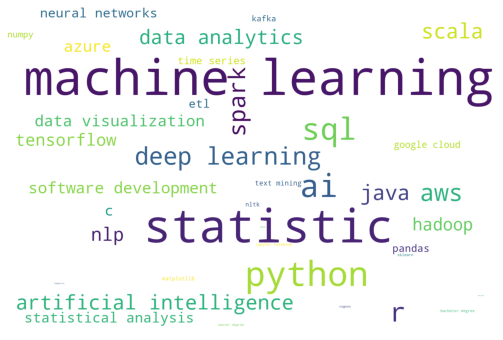

In [65]:
from wordcloud import WordCloud

dictionary= l
wordcloud = WordCloud(background_color='white',
                      width=1500,
                      height=1000
                      ).generate_from_frequencies(dictionary)
# use .generate(space_separated_string) - to generate cloud from text

plt.figure(figsize=(9,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [66]:
for item in keywords:
    counts = df_ds['Job Description'].str.count(item)
    df_ds[item] = counts
    df_ds[item] = np.where(df_ds[item]==0, 0, 1)
df_ds.head(3)

<ipython-input-66-306f6d76d423>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ds[item] = counts
<ipython-input-66-306f6d76d423>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ds[item] = np.where(df_ds[item]==0, 0, 1)


,Job Title,Company Name,Location,job URL,Job Description,Group,python,ai,r,sql,...,copmuter science,time series,software development,Natural Language Processing,nlp,text mining,nltk,scala,c,java
0,Data Scientist,MSi Corp (Bell Canada),"Toronto, ON",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,telecom client looking junior intermediate lev...,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Data Scientist,Modern Cleaning Concept,"Lasalle, QC",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,job description – data scientistwe looking car...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,Slice Insurance Technologies Inc.,"Ottawa, ON",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,slice labs ( slice ) ’ building team innovator...,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [67]:
tmp = sorted(l.items(), key=lambda x: x[1], reverse=True)
l_sorted = {}
for i in tmp[:15]:
    l_sorted[i[0]]= i[1]
l_sorted

{'machine learning': 6437,
 'statistic': 5681,
 'python': 2748,
 ' ai ': 2320,
 'sql': 2173,
 ' r ': 1625,
 'deep learning': 1313,
 'aws': 1285,
 'spark': 1225,
 'scala': 993,
 'java': 985,
 'artificial intelligence': 944,
 'data analytics': 875,
 'nlp': 744,
 'hadoop': 648}

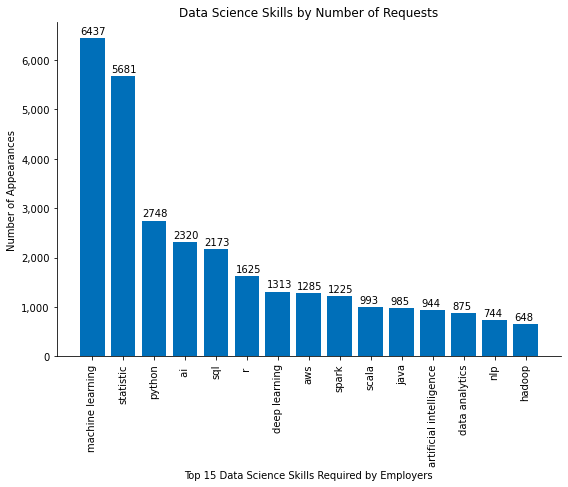

In [68]:
# Generating a bar chart for number of job postings by city:




tmp = sorted(l.items(), key=lambda x: x[1], reverse=True)
l_sorted = {}
for i in tmp[:15]:
    l_sorted[i[0]]= i[1]


plt.figure(figsize=(10,8))
xvals = l_sorted.keys()
yvals = list(l_sorted.values())
plt.bar(xvals, yvals, color='#006fb9')
plt.xticks(rotation=90)
#plt.margins(0.2)

plt.subplots_adjust(bottom=0.3, left=0.2) # To make sure the x axis labels are visible
plt.title('Data Science Skills by Number of Requests')
plt.xlabel('Top 15 Data Science Skills Required by Employers')
plt.ylabel('Number of Appearances')

#Having the y axis formatted as thousand separated in case there are more than a thousand jobs
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.spines['top'].set_visible(False) # Removing the top border
ax.spines['right'].set_visible(False) # Removing the righ border

for i, v in enumerate(yvals): # Showing the data values on top of the bars
    ax.text(i-0.37, v+80, str(v)) # i and v show the position of the data labels

plt.show()

In [69]:
df_ds.head(3)

,Job Title,Company Name,Location,job URL,Job Description,Group,python,ai,r,sql,...,copmuter science,time series,software development,Natural Language Processing,nlp,text mining,nltk,scala,c,java
0,Data Scientist,MSi Corp (Bell Canada),"Toronto, ON",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,telecom client looking junior intermediate lev...,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Data Scientist,Modern Cleaning Concept,"Lasalle, QC",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,job description – data scientistwe looking car...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,Slice Insurance Technologies Inc.,"Ottawa, ON",http://www.indeed.ca/pagead/clk?mo=r&ad=-6NYlb...,slice labs ( slice ) ’ building team innovator...,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [70]:
df_ds['Location'].unique()

array(['Toronto, ON', 'Lasalle, QC', 'Ottawa, ON', 'Waterloo, ON',
       'Moncton, NB', 'London, ON', 'Laval, QC', 'Montréal, QC',
       'Markham, ON', 'Calgary, AB', 'Saskatoon, SK', 'Dartmouth, NS',
       'Mountain View, AB', nan, 'Saint-Laurent, QC', 'Guelph, ON',
       'Vancouver, BC', 'Edmonton, AB', 'Surrey, BC', 'Park, MB',
       'Ontario', 'Dorval, QC', 'Victoria, BC', 'Mississauga, ON',
       'Welland, ON', 'Oakville, ON', 'Burnaby, BC', 'Quebec City, QC',
       'Brampton, ON', 'Kanata, ON', 'Fort McMurray, AB', 'Windsor, ON',
       'Canada', 'Etobicoke, ON', 'Kitchener, ON', 'Whitby, ON',
       'Mirabel, QC', 'Halton, ON', 'Winnipeg, MB', "St. John's, NL",
       'Lethbridge, AB', 'Kirkland, QC', 'Sherbrooke, QC',
       'Charlottetown, PE', 'Regina, SK', 'Engineer, BC', 'Work at Home',
       'Vernon, BC', 'Concord, ON', 'Richmond Hill, ON', 'North York, ON',
       'Remote', 'Kelowna, BC', 'Halifax, NS', 'Richmond, BC',
       'Hamilton, ON', 'Gilbert, AZ 85297', '

In [71]:
tmp = df_ds.groupby('Location')['Location'].count().to_frame()
tmp.columns=['Jobs_Count']
tmp.sort_values(by='Jobs_Count', ascending=False)[:20]

,Jobs_Count
Location,
"Toronto, ON",231
"Seattle, WA",219
"New York, NY",186
"San Francisco, CA",141
"Montréal, QC",103
"Austin, TX",74
"Boston, MA",67
"Ottawa, ON",59
"Cambridge, MA",55


In [74]:
df_cities = df_ds[(df_ds['Location']=='Ottawa, ON') | (df_ds['Location']=='Toronto, ON') | 
                  (df_ds['Location']=='Vancouver, BC') | (df_ds['Location']=='Montreal, QC')
                 | (df_ds['Location']=='Waterloo, ON') | (df_ds['Location']=='Toronto, ON')
                 | (df_ds['Location']=='Calgary, AB')]
df_cities['Location'].unique()

array(['Toronto, ON', 'Ottawa, ON', 'Waterloo, ON', 'Calgary, AB',
       'Vancouver, BC'], dtype=object)

In [77]:
Jobs_cities = df_cities.groupby('Location').agg({skill:'count'})
Jobs_cities = Jobs_cities.reset_index()

Jobs_cities.columns = Jobs_cities.columns.to_series().str.join('_')
Jobs_cities.columns = ['Location', 'Total_Jobs']


for skill in ['machine learning', 'python', 'sql', ' r ']:
    tmp = df_cities.groupby('Location').agg({skill:'sum'})
    tmp = tmp.reset_index()

    tmp.columns = tmp.columns.to_series().str.join('_')
    tmp.columns = ['Location', skill]
    #tmp['percentage'] = (tmp[skill+'_sum']/tmp[skill+'_count']).round(2)
    Jobs_cities = Jobs_cities.merge(tmp, how='inner', on='Location')
    Jobs_cities[skill+'_percentage'] = (Jobs_cities[skill] / Jobs_cities['Total_Jobs']*100).round(0).astype(int)
Jobs_cities

,Location,Total_Jobs,machine learning,machine learning_percentage,python,python_percentage,sql,sql_percentage,r,r _percentage
0,"Calgary, AB",26,19,73,18,69,12,46,8,31
1,"Ottawa, ON",59,47,80,55,93,44,75,15,25
2,"Toronto, ON",231,134,58,164,71,143,62,113,49
3,"Vancouver, BC",54,36,67,33,61,23,43,21,39
4,"Waterloo, ON",12,9,75,8,67,5,42,1,8


In [78]:
new_columns = ['Location']
for item in Jobs_cities.columns:
    if item.endswith('age'):
        new_columns.append(item)
new_columns        

['Location',
 'machine learning_percentage',
 'python_percentage',
 'sql_percentage',
 ' r _percentage']

In [79]:
Jobs_cities = Jobs_cities[new_columns]
Jobs_cities.columns = [x.split('_')[0] for x in Jobs_cities.columns]
Jobs_cities

,Location,machine learning,python,sql,r
0,"Calgary, AB",73,69,46,31
1,"Ottawa, ON",80,93,75,25
2,"Toronto, ON",58,71,62,49
3,"Vancouver, BC",67,61,43,39
4,"Waterloo, ON",75,67,42,8


In [80]:
Jobs_cities.columns[1:]

Index(['machine learning', 'python', 'sql', ' r '], dtype='object')

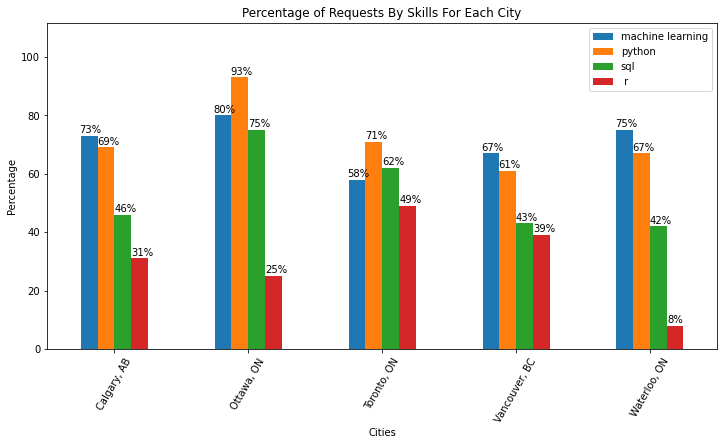

In [91]:


Jobs_cities.plot.bar(x = 'Location', y = Jobs_cities.columns[1:]) # Creating the chart and specifying the axis

title = 'Percentage of Requests By Skills For Each City'

# Setting the chart title and axis labels:
plt.title(title) 
plt.xlabel('Cities')
plt.ylabel('Percentage')


plt.margins(0.2)
plt.xticks(rotation=60)

for i, v in enumerate(Jobs_cities['machine learning']):
    plt.text(i-0.26, v+1, str(v)+'%',  fontsize = 'medium')
    
for i, v in enumerate(Jobs_cities['python']):
    plt.text(i-0.13, v+1, str(v)+'%',  fontsize = 'medium')
    
for i, v in enumerate(Jobs_cities['sql']):
    plt.text(i, v+1, str(v)+'%',  fontsize = 'medium')
    
for i, v in enumerate(Jobs_cities[' r ']):
    plt.text(i+0.13, v+1, str(v)+'%',  fontsize = 'medium')
